### Topic modeling using TFIDF NMF with custom stop words

In [1]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import nltk
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation
import collections
import numpy as np
from collections import Counter
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import datetime
import pickle

In [381]:
df = pd.read_csv('ArticleMaster.csv')
df.shape

(18945, 11)

### Data Prepping

In [3]:
# tokenizing: getting rid of punctuations, replacing '-', lowercasing, getting rid of single characters 
def TokenizeData(content):
    word_punct_tokenizer = nltk.tokenize.WordPunctTokenizer()
    tokens = word_punct_tokenizer.tokenize(content)
    tokens = [w.replace('-','') for w in tokens]
    tokens = [w.lower() for w in tokens if w.isalpha()]
    tokens = [w for w in tokens if len(w) > 1]
    return tokens

In [4]:
# joining articles. result is one single entry (string)
content_list = df['article']
all_content = " ".join(a for a in content_list)

In [5]:
# tokenizing data
tokened_data = TokenizeData(all_content)

In [6]:
#counting the appearance of words in data. result is a dictionary {word: num_count}
frequency = Counter(tokened_data)

In [7]:
# sorting my frequency dict and returning a decreasing list of tuples (word: count)
import operator
sorted_x = sorted(frequency.items(), key=operator.itemgetter(1), reverse=True)

In [8]:
# making a list with most popular words above count 49669
stop_token = []
for i in sorted_x:
    if i[1]>=49669:
        stop_token.append(i[0])

In [9]:
#nltk.download('stopwords')

In [10]:
#importing the list of 'english' stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [11]:
# stop_word list
stop_word = stop_token + stop +['like', 'get', 'ms', 'want', 'many', 'go', 'much', 'lot', 'case', 'mr', 'mrs', 'wednesday', 'tuesday', 'america',
                               'got', 'things', 'something', 'really', 'let', 'thing', 'big', 'book', 'sure', 'appeals', 'apparently', 'al', 'add',
                               'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'always', 'went', 'run','lawyer', 'refugee',
                               'de', 'students', 'el', 'note', 'morning', 'san', 'area', 'near', 'jan', 'great', 'look', 'question', 'street', 'believe', 'kind',
                               'best', 'tell', 'talk', 'done', 'town', 'night', 'real', 'ever', 'story','feel', 'thought']

In [12]:
stop_word

['the',
 'to',
 'of',
 'and',
 'in',
 'that',
 'for',
 'on',
 'is',
 'mr',
 'said',
 'he',
 'it',
 'was',
 'with',
 'as',
 'have',
 'his',
 'by',
 'they',
 'are',
 'who',
 'from',
 'at',
 'not',
 'be',
 'but',
 'an',
 'has',
 'we',
 'this',
 'had',
 'would',
 'their',
 'you',
 'about',
 'or',
 'were',
 'immigration',
 'states',
 'new',
 'more',
 'will',
 'been',
 'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'unti

###  TFIDF Vectorizing

In [13]:
vectorizer = TfidfVectorizer(max_df=0.2, min_df=.05, stop_words= stop_word,
                                 token_pattern="\\b[a-z][a-z]+\\b")
  

tfidf = vectorizer.fit_transform(df['article'])
    
num_words, num_entries = tfidf.shape
print("Number of Entries: %d" % num_entries)
print("Number of Words: %d" % num_words)

Number of Entries: 1312
Number of Words: 18945


### NMF

In [85]:
num_topics = 30
nmf = NMF(n_components=num_topics)
vector = nmf.fit_transform(tfidf)

In [86]:
import pickle
pickle.dump(nmf, open("nmf_immigration.pkl", 'wb'))

In [87]:
nmf.reconstruction_err_

118.39811391151844

In [88]:
vocab = vectorizer.get_feature_names()
vocab

['ability',
 'able',
 'abortion',
 'abroad',
 'accept',
 'accepted',
 'access',
 'account',
 'accused',
 'acknowledged',
 'act',
 'acting',
 'action',
 'actions',
 'activities',
 'activity',
 'actually',
 'adding',
 'addition',
 'additional',
 'address',
 'adopted',
 'advantage',
 'adviser',
 'advisers',
 'advocacy',
 'advocates',
 'affairs',
 'affect',
 'africa',
 'african',
 'afternoon',
 'age',
 'agencies',
 'agency',
 'agenda',
 'agent',
 'agents',
 'agree',
 'agreed',
 'agreement',
 'ahead',
 'aid',
 'aides',
 'air',
 'airport',
 'alien',
 'aliens',
 'allies',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'almost',
 'alone',
 'along',
 'although',
 'amendment',
 'amnesty',
 'amount',
 'analysis',
 'angeles',
 'angry',
 'announced',
 'annual',
 'answer',
 'anti',
 'anyone',
 'anything',
 'appeal',
 'appear',
 'appeared',
 'appears',
 'application',
 'applications',
 'applied',
 'apply',
 'approach',
 'approval',
 'approved',
 'april',
 'areas',
 'argue',
 'argued',
 'argument',
 '

In [89]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [90]:
print_top_words(nmf, vocab, 20)

Topic #0:
standard history class article research education language knows information english student write questions read standards different web cultural schools com
Topic #1:
trump donald twitter wall order ban russia media muslim undocumented deal policies comments hillary speech remarks trade supporters meeting adviser
Topic #2:
romney mitt iowa debate massachusetts candidates paul voters florida governor candidate speech record mike polls economy audience carolina advisers conservative
Topic #3:
cuban cuba miami florida relatives agreement father talks radio prison relations island return release custody foundation latin negotiations travel section
Topic #4:
judge ruling district order lawyers ruled judges trial hearing ordered appeal supreme lawsuit issued filed courts deportation defense argued panel
Topic #5:
charges arrested prison prosecutors authorities charged trial detention criminal convicted attorney investigation jail lawyers men company accused deported released arre

In [91]:
# list of top topic words used for labeling graphs
topic_words = []
for r in nmf.components_:
    r_normalized = r/sum(r)
    a = sorted([(v,i) for i,v in enumerate(r_normalized)],reverse=True)
    topic_words.append([ f"{vocab[e[1]]}, {e[0]:.2%}"  for e in a])

f = pd.DataFrame(np.array(topic_words).T)

f_list=list(f.iloc[0, :])
list_topic = [ x.split(',')[0] for x in f_list]
list_topic

['standard',
 'trump',
 'romney',
 'cuban',
 'judge',
 'charges',
 'voters',
 'refugees',
 'father',
 'clinton',
 'soviet',
 'mexico',
 'aliens',
 'mccain',
 'intelligence',
 'legislation',
 'hispanic',
 'asylum',
 'chinese',
 'police',
 'israel',
 'los',
 'patrol',
 'justice',
 'church',
 'tax',
 'visas',
 'guard',
 'citizenship',
 'dr']

In [92]:
pickle.dump(feat_words, open('feat_words_df.pkl', 'wb'))

NameError: name 'feat_words' is not defined

In [93]:
df['topic'] = [np.argmax(row) for row in vector]
df['topic']

0        27
1        25
2         3
3        12
4        17
5        12
6        17
7        12
8         5
9        18
10       12
11       10
12        8
13       19
14        4
15       25
16       12
17        4
18       20
19       26
20       12
21       22
22        8
23        4
24       25
25        4
26        7
27       17
28       17
29        7
         ..
18915     6
18916    21
18917     6
18918     1
18919     5
18920     8
18921     6
18922     1
18923    15
18924    23
18925    15
18926    20
18927    29
18928    15
18929     6
18930     6
18931     6
18932    15
18933     1
18934    15
18935     1
18936     1
18937    23
18938     3
18939    20
18940     1
18941     7
18942     5
18943    25
18944    20
Name: topic, Length: 18945, dtype: int64

In [94]:
doc_max_topic = np.argmax(vector, axis=1)
doc_max_topic

array([27, 25,  3, ...,  5, 25, 20])

In [95]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18945 entries, 0 to 18944
Data columns (total 14 columns):
Unnamed: 0    18945 non-null int64
article       18945 non-null object
date          18945 non-null datetime64[ns]
headline      18945 non-null object
id            18945 non-null object
score         18945 non-null float64
snippet       18945 non-null object
source        18904 non-null object
type          18944 non-null object
url           18945 non-null object
word_count    18945 non-null int64
topic         18945 non-null int64
year          18945 non-null int64
month         18945 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 2.0+ MB


In [96]:
df['date']= pd.to_datetime(df['date'], infer_datetime_format=True)

In [97]:
df['year'] = df['date'].dt.year
df['year']

0        1981
1        1981
2        1981
3        1981
4        1981
5        1981
6        1981
7        1981
8        1981
9        1981
10       1981
11       1981
12       1981
13       1981
14       1981
15       1981
16       1981
17       1981
18       1981
19       1981
20       1981
21       1981
22       1981
23       1981
24       1981
25       1981
26       1981
27       1981
28       1981
29       1981
         ... 
18915    2018
18916    2018
18917    2018
18918    2018
18919    2018
18920    2018
18921    2018
18922    2018
18923    2018
18924    2018
18925    2018
18926    2018
18927    2018
18928    2018
18929    2018
18930    2018
18931    2018
18932    2018
18933    2018
18934    2018
18935    2018
18936    2018
18937    2018
18938    2018
18939    2018
18940    2018
18941    2018
18942    2018
18943    2018
18944    2018
Name: year, Length: 18945, dtype: int64

In [98]:
df['month'] = df['date'].dt.month
df.columns

Index(['Unnamed: 0', 'article', 'date', 'headline', 'id', 'score', 'snippet',
       'source', 'type', 'url', 'word_count', 'topic', 'year', 'month'],
      dtype='object')

In [99]:
df_count =pd.DataFrame(df.groupby('topic')['article'].count())


In [164]:
topic_labels = [
                   'Education Standards',
                   'Trump',
                   'Romney',
                   'Cuban Relations',
                   'Judicial',
                   'Prosecution & Criminality',
                   'Polling',
                   'Refugees',
                   'Family',
                   'Democrats',
                   'US/Soviet Disarmament',
                   'Mexican Relations',
                   'Reagan\'s Amnesty',
                   'Bipartisanship',
                   'Terrorism',
                   'Congress',
                   'Census',
                   'Asylum',
                   'Foriegn Trade',
                   'Police Brutality',
                   'Peace Talks',
                   'California',
                   'Southern Border',
                   'Judicial',
                   'Catholic Church',
                   'Job Growth',
                   'Visas',
                   'Coast Guard',
                   'DACA',
                   'Health Care',
               ]
x= df_count.index
y = df_count['article']
y

topic
0      314
1     1596
2      391
3      534
4      450
5      501
6      959
7      485
8      870
9      462
10     420
11     529
12     526
13     338
14     654
15     916
16     490
17     460
18     396
19     625
20    1090
21     562
22     521
23     722
24     357
25    1155
26     577
27     389
28    1152
29     504
Name: article, dtype: int64

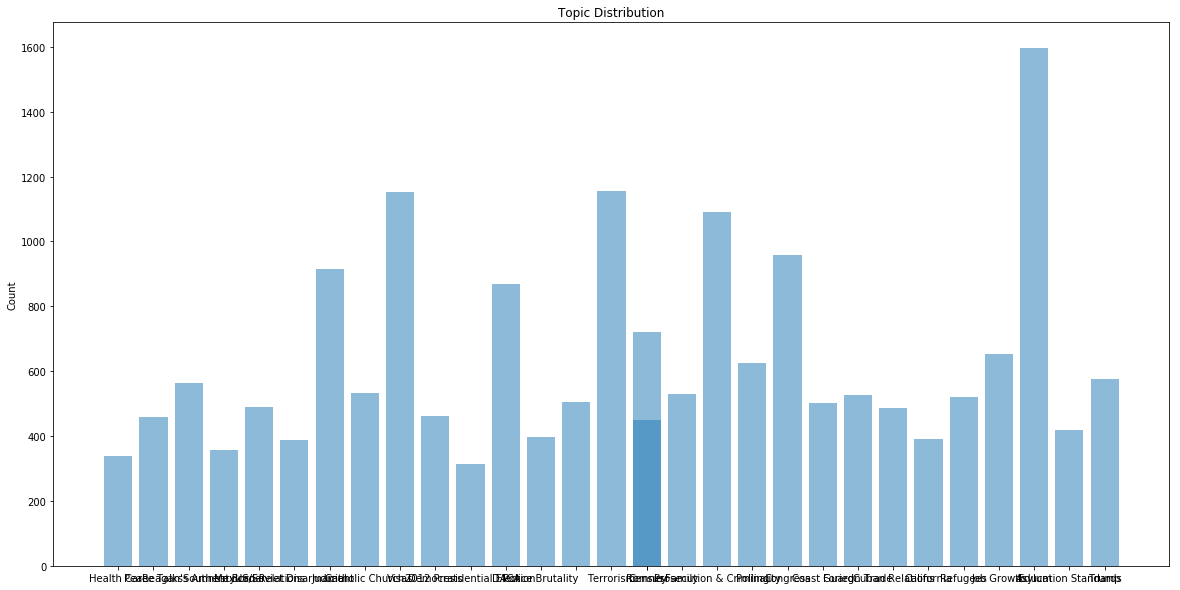

In [165]:
plt.figure(figsize=(20, 10))
plt.bar(topic_labels, y, align='center', alpha=0.5)
plt.xticks(topic_labels, )
plt.ylabel('Count')
plt.title('Topic Distribution')
 
plt.show()

In [150]:
year_df= pd.DataFrame(df.groupby('year')['article'].count())
x= year_df.index
y= year_df.article

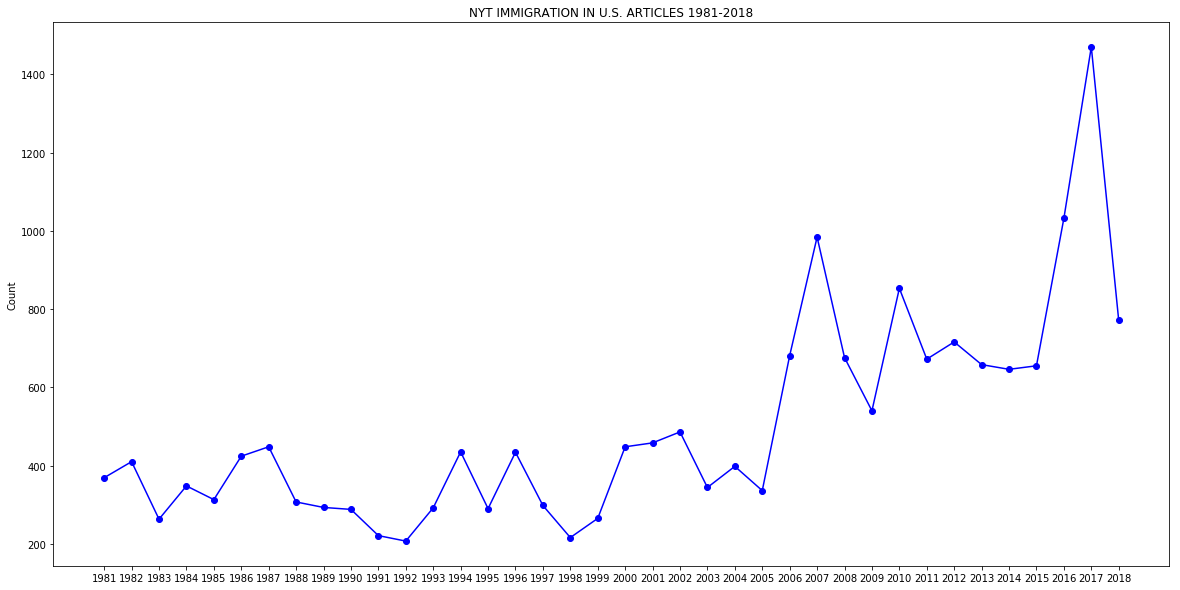

In [163]:
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'bo-')
plt.xticks(x, )
plt.ylabel('Count')
plt.title('NYT IMMIGRATION IN U.S. ARTICLES 1981-2018')
 
plt.show()

In [102]:
df

,Unnamed: 0,article,date,headline,id,score,snippet,source,type,url,word_count,topic,year,month
0,0,"['A son of Robert L. Vesco, the fugitive Ameri...",1981-01-02,b'Vesco Son Says His Father Will Return Home S...,4fd1167d8eb7c8105d5cd5a7,0.003075,"b""A son of Robert L. Vesco, the fugitive Ameri...",The New York Times,News,https://www.nytimes.com/1981/01/02/us/around-t...,170,27,1981,1
1,1,"[""Japanese investors have now bought almost ev...",1981-01-03,"b""SWELLING JAPANESE INVESTMENT IS PLAYING A KE...",4fd117098eb7c8105d5ce352,0.002930,"b""Japanese investors have now bought almost ev...",The New York Times,News,https://www.nytimes.com/1981/01/03/us/swelling...,887,25,1981,1
2,2,"[""Federal officials said today that the Govern...",1981-01-03,b'U.S. MAY APPEAL RULING FORBIDDING INDEFINITE...,4fd11cb88eb7c8105d5d9d45,0.013576,"b""Federal officials said today that the Govern...",The New York Times,News,https://www.nytimes.com/1981/01/03/us/us-may-a...,718,3,1981,1
3,3,['The General Accounting Office says there app...,1981-01-04,b'BOGUS SOCIAL SECURITY CARDS FOUND INCREASING...,4fd11cba8eb7c8105d5d9ef5,0.003003,b'The General Accounting Office says there app...,The New York Times,News,https://www.nytimes.com/1981/01/04/us/bogus-so...,677,12,1981,1
4,4,"[""Robert L. Vesco, the fugitive American finan...",1981-01-04,"b""VESCO ASSERTS HE ISN'T IN HIDING""",4fd111ab8eb7c8105d5c825f,0.003026,"b""Robert L. Vesco, the fugitive American finan...",The New York Times,News,https://www.nytimes.com/1981/01/04/us/vesco-as...,253,17,1981,1
5,5,['After months of intense lobbying and interna...,1981-01-07,b'IDENTIFICATION CARD IDEA SHELVED BY A U.S. P...,4fd10cdf8eb7c8105d5c0e10,0.012033,b'After months of intense lobbying and interna...,The New York Times,News,https://www.nytimes.com/1981/01/07/us/identifi...,230,12,1981,1
6,6,['Bahamian immigration officials who want to d...,1981-01-08,b'Bahamian Officials Order Vesco To Leave the ...,4fd1162c8eb7c8105d5ccc3f,0.010615,b'Bahamian immigration officials who want to d...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/bahamian...,178,17,1981,1
7,7,['A Federal immigration commission today retra...,1981-01-08,b'Immigration Panel Modifies Opposition to Ide...,4fd10ce08eb7c8105d5c0f26,0.024651,b'A Federal immigration commission today retra...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/around-t...,145,12,1981,1
8,8,"[""Former Representative Richard Kelly steadfas...",1981-01-08,"b'KELLY SAYS HE TOOK $25,000 AS COVER-UP'",4fd116838eb7c8105d5cd8cc,0.003124,"b""Former Representative Richard Kelly steadfas...",The New York Times,News,https://www.nytimes.com/1981/01/08/us/kelly-sa...,504,5,1981,1
9,9,['Scheduled passenger airline service between ...,1981-01-08,b'SCHEDULED AIR SERVICE FROM CHINA TO U.S. RES...,4fd10ddb8eb7c8105d5c2937,0.008202,b'Scheduled passenger airline service between ...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/schedule...,640,18,1981,1


In [103]:
df.drop(["Unnamed: 0"], axis=1)

,article,date,headline,id,score,snippet,source,type,url,word_count,topic,year,month
0,"['A son of Robert L. Vesco, the fugitive Ameri...",1981-01-02,b'Vesco Son Says His Father Will Return Home S...,4fd1167d8eb7c8105d5cd5a7,0.003075,"b""A son of Robert L. Vesco, the fugitive Ameri...",The New York Times,News,https://www.nytimes.com/1981/01/02/us/around-t...,170,27,1981,1
1,"[""Japanese investors have now bought almost ev...",1981-01-03,"b""SWELLING JAPANESE INVESTMENT IS PLAYING A KE...",4fd117098eb7c8105d5ce352,0.002930,"b""Japanese investors have now bought almost ev...",The New York Times,News,https://www.nytimes.com/1981/01/03/us/swelling...,887,25,1981,1
2,"[""Federal officials said today that the Govern...",1981-01-03,b'U.S. MAY APPEAL RULING FORBIDDING INDEFINITE...,4fd11cb88eb7c8105d5d9d45,0.013576,"b""Federal officials said today that the Govern...",The New York Times,News,https://www.nytimes.com/1981/01/03/us/us-may-a...,718,3,1981,1
3,['The General Accounting Office says there app...,1981-01-04,b'BOGUS SOCIAL SECURITY CARDS FOUND INCREASING...,4fd11cba8eb7c8105d5d9ef5,0.003003,b'The General Accounting Office says there app...,The New York Times,News,https://www.nytimes.com/1981/01/04/us/bogus-so...,677,12,1981,1
4,"[""Robert L. Vesco, the fugitive American finan...",1981-01-04,"b""VESCO ASSERTS HE ISN'T IN HIDING""",4fd111ab8eb7c8105d5c825f,0.003026,"b""Robert L. Vesco, the fugitive American finan...",The New York Times,News,https://www.nytimes.com/1981/01/04/us/vesco-as...,253,17,1981,1
5,['After months of intense lobbying and interna...,1981-01-07,b'IDENTIFICATION CARD IDEA SHELVED BY A U.S. P...,4fd10cdf8eb7c8105d5c0e10,0.012033,b'After months of intense lobbying and interna...,The New York Times,News,https://www.nytimes.com/1981/01/07/us/identifi...,230,12,1981,1
6,['Bahamian immigration officials who want to d...,1981-01-08,b'Bahamian Officials Order Vesco To Leave the ...,4fd1162c8eb7c8105d5ccc3f,0.010615,b'Bahamian immigration officials who want to d...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/bahamian...,178,17,1981,1
7,['A Federal immigration commission today retra...,1981-01-08,b'Immigration Panel Modifies Opposition to Ide...,4fd10ce08eb7c8105d5c0f26,0.024651,b'A Federal immigration commission today retra...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/around-t...,145,12,1981,1
8,"[""Former Representative Richard Kelly steadfas...",1981-01-08,"b'KELLY SAYS HE TOOK $25,000 AS COVER-UP'",4fd116838eb7c8105d5cd8cc,0.003124,"b""Former Representative Richard Kelly steadfas...",The New York Times,News,https://www.nytimes.com/1981/01/08/us/kelly-sa...,504,5,1981,1
9,['Scheduled passenger airline service between ...,1981-01-08,b'SCHEDULED AIR SERVICE FROM CHINA TO U.S. RES...,4fd10ddb8eb7c8105d5c2937,0.008202,b'Scheduled passenger airline service between ...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/schedule...,640,18,1981,1


In [104]:
topics = pd.DataFrame(vector)

In [105]:
topics.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.000862,0.000000,0.017970,0.007821,0.020348,0.000000,0.000339,0.026772,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004610,0.028067,0.024577,0.000000
1,0.012489,0.000000,0.000254,0.000210,0.000000,0.027275,0.000463,0.001040,0.002092,0.000000,...,0.006213,0.0,0.000000,0.000000,0.000000,0.050178,0.003344,0.026104,0.000000,0.001028
2,0.000000,0.000000,0.000000,0.101592,0.064163,0.028622,0.000000,0.002648,0.000000,0.000000,...,0.000000,0.0,0.000000,0.027287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.003515,0.000000,0.001535,0.000000,0.000000,...,0.000000,0.0,0.000337,0.000000,0.000540,0.048261,0.002803,0.000000,0.014086,0.018844
4,0.000000,0.001556,0.000653,0.002764,0.000000,0.028891,0.000000,0.000000,0.007283,0.000938,...,0.000000,0.0,0.000000,0.011813,0.001556,0.000201,0.003087,0.007655,0.009877,0.000000


In [106]:
df.drop(["Unnamed: 0"], axis=1)

,article,date,headline,id,score,snippet,source,type,url,word_count,topic,year,month
0,"['A son of Robert L. Vesco, the fugitive Ameri...",1981-01-02,b'Vesco Son Says His Father Will Return Home S...,4fd1167d8eb7c8105d5cd5a7,0.003075,"b""A son of Robert L. Vesco, the fugitive Ameri...",The New York Times,News,https://www.nytimes.com/1981/01/02/us/around-t...,170,27,1981,1
1,"[""Japanese investors have now bought almost ev...",1981-01-03,"b""SWELLING JAPANESE INVESTMENT IS PLAYING A KE...",4fd117098eb7c8105d5ce352,0.002930,"b""Japanese investors have now bought almost ev...",The New York Times,News,https://www.nytimes.com/1981/01/03/us/swelling...,887,25,1981,1
2,"[""Federal officials said today that the Govern...",1981-01-03,b'U.S. MAY APPEAL RULING FORBIDDING INDEFINITE...,4fd11cb88eb7c8105d5d9d45,0.013576,"b""Federal officials said today that the Govern...",The New York Times,News,https://www.nytimes.com/1981/01/03/us/us-may-a...,718,3,1981,1
3,['The General Accounting Office says there app...,1981-01-04,b'BOGUS SOCIAL SECURITY CARDS FOUND INCREASING...,4fd11cba8eb7c8105d5d9ef5,0.003003,b'The General Accounting Office says there app...,The New York Times,News,https://www.nytimes.com/1981/01/04/us/bogus-so...,677,12,1981,1
4,"[""Robert L. Vesco, the fugitive American finan...",1981-01-04,"b""VESCO ASSERTS HE ISN'T IN HIDING""",4fd111ab8eb7c8105d5c825f,0.003026,"b""Robert L. Vesco, the fugitive American finan...",The New York Times,News,https://www.nytimes.com/1981/01/04/us/vesco-as...,253,17,1981,1
5,['After months of intense lobbying and interna...,1981-01-07,b'IDENTIFICATION CARD IDEA SHELVED BY A U.S. P...,4fd10cdf8eb7c8105d5c0e10,0.012033,b'After months of intense lobbying and interna...,The New York Times,News,https://www.nytimes.com/1981/01/07/us/identifi...,230,12,1981,1
6,['Bahamian immigration officials who want to d...,1981-01-08,b'Bahamian Officials Order Vesco To Leave the ...,4fd1162c8eb7c8105d5ccc3f,0.010615,b'Bahamian immigration officials who want to d...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/bahamian...,178,17,1981,1
7,['A Federal immigration commission today retra...,1981-01-08,b'Immigration Panel Modifies Opposition to Ide...,4fd10ce08eb7c8105d5c0f26,0.024651,b'A Federal immigration commission today retra...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/around-t...,145,12,1981,1
8,"[""Former Representative Richard Kelly steadfas...",1981-01-08,"b'KELLY SAYS HE TOOK $25,000 AS COVER-UP'",4fd116838eb7c8105d5cd8cc,0.003124,"b""Former Representative Richard Kelly steadfas...",The New York Times,News,https://www.nytimes.com/1981/01/08/us/kelly-sa...,504,5,1981,1
9,['Scheduled passenger airline service between ...,1981-01-08,b'SCHEDULED AIR SERVICE FROM CHINA TO U.S. RES...,4fd10ddb8eb7c8105d5c2937,0.008202,b'Scheduled passenger airline service between ...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/schedule...,640,18,1981,1


In [107]:
master_df = pd.merge(df, topics, left_index=True, right_index=True)
master_df

,Unnamed: 0,article,date,headline,id,score,snippet,source,type,url,...,20,21,22,23,24,25,26,27,28,29
0,0,"['A son of Robert L. Vesco, the fugitive Ameri...",1981-01-02,b'Vesco Son Says His Father Will Return Home S...,4fd1167d8eb7c8105d5cd5a7,0.003075,"b""A son of Robert L. Vesco, the fugitive Ameri...",The New York Times,News,https://www.nytimes.com/1981/01/02/us/around-t...,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004610,0.028067,0.024577,0.000000
1,1,"[""Japanese investors have now bought almost ev...",1981-01-03,"b""SWELLING JAPANESE INVESTMENT IS PLAYING A KE...",4fd117098eb7c8105d5ce352,0.002930,"b""Japanese investors have now bought almost ev...",The New York Times,News,https://www.nytimes.com/1981/01/03/us/swelling...,...,0.006213,0.000000,0.000000,0.000000,0.000000,0.050178,0.003344,0.026104,0.000000,0.001028
2,2,"[""Federal officials said today that the Govern...",1981-01-03,b'U.S. MAY APPEAL RULING FORBIDDING INDEFINITE...,4fd11cb88eb7c8105d5d9d45,0.013576,"b""Federal officials said today that the Govern...",The New York Times,News,https://www.nytimes.com/1981/01/03/us/us-may-a...,...,0.000000,0.000000,0.000000,0.027287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,['The General Accounting Office says there app...,1981-01-04,b'BOGUS SOCIAL SECURITY CARDS FOUND INCREASING...,4fd11cba8eb7c8105d5d9ef5,0.003003,b'The General Accounting Office says there app...,The New York Times,News,https://www.nytimes.com/1981/01/04/us/bogus-so...,...,0.000000,0.000000,0.000337,0.000000,0.000540,0.048261,0.002803,0.000000,0.014086,0.018844
4,4,"[""Robert L. Vesco, the fugitive American finan...",1981-01-04,"b""VESCO ASSERTS HE ISN'T IN HIDING""",4fd111ab8eb7c8105d5c825f,0.003026,"b""Robert L. Vesco, the fugitive American finan...",The New York Times,News,https://www.nytimes.com/1981/01/04/us/vesco-as...,...,0.000000,0.000000,0.000000,0.011813,0.001556,0.000201,0.003087,0.007655,0.009877,0.000000
5,5,['After months of intense lobbying and interna...,1981-01-07,b'IDENTIFICATION CARD IDEA SHELVED BY A U.S. P...,4fd10cdf8eb7c8105d5c0e10,0.012033,b'After months of intense lobbying and interna...,The New York Times,News,https://www.nytimes.com/1981/01/07/us/identifi...,...,0.000000,0.000000,0.000000,0.001134,0.000213,0.000000,0.004353,0.000759,0.000000,0.003100
6,6,['Bahamian immigration officials who want to d...,1981-01-08,b'Bahamian Officials Order Vesco To Leave the ...,4fd1162c8eb7c8105d5ccc3f,0.010615,b'Bahamian immigration officials who want to d...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/bahamian...,...,0.000000,0.000000,0.000000,0.004954,0.000000,0.006620,0.008045,0.006144,0.007381,0.000000
7,7,['A Federal immigration commission today retra...,1981-01-08,b'Immigration Panel Modifies Opposition to Ide...,4fd10ce08eb7c8105d5c0f26,0.024651,b'A Federal immigration commission today retra...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/around-t...,...,0.002159,0.000804,0.000000,0.000367,0.000000,0.000000,0.001457,0.006521,0.005439,0.002035
8,8,"[""Former Representative Richard Kelly steadfas...",1981-01-08,"b'KELLY SAYS HE TOOK $25,000 AS COVER-UP'",4fd116838eb7c8105d5cd8cc,0.003124,"b""Former Representative Richard Kelly steadfas...",The New York Times,News,https://www.nytimes.com/1981/01/08/us/kelly-sa...,...,0.000000,0.000000,0.023568,0.000000,0.000000,0.000000,0.000000,0.007855,0.000000,0.000000
9,9,['Scheduled passenger airline service between ...,1981-01-08,b'SCHEDULED AIR SERVICE FROM CHINA TO U.S. RES...,4fd10ddb8eb7c8105d5c2937,0.008202,b'Scheduled passenger airline service between ...,The New York Times,News,https://www.nytimes.com/1981/01/08/us/schedule...,...,0.000000,0.019025,0.002542,0.000000,0.000000,0.000000,0.007612,0.016667,0.000000,0.000000


In [374]:
master_df.columns

Index(['Unnamed: 0',    'article',       'date',   'headline',         'id',
            'score',    'snippet',     'source',       'type',        'url',
       'word_count',      'topic',       'year',      'month',            0,
                  1,            2,            3,            4,            5,
                  6,            7,            8,            9,           10,
                 11,           12,           13,           14,           15,
                 16,           17,           18,           19,           20,
                 21,           22,           23,           24,           25,
                 26,           27,           28,           29,  'sentiment'],
      dtype='object')

In [375]:
pickle.dump(master_df, open("master_df.pkl", 'wb'))

In [376]:
master_df.to_csv('topics_df.csv')

In [111]:
from sklearn.manifold import TSNE
# plot with tsne!

doc_plot = TSNE(n_components=2,verbose=1, metric="cosine", perplexity=20).fit_transform(vector[::30,:])

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 632 samples in 0.001s...
[t-SNE] Computed neighbors for 632 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 632 / 632
[t-SNE] Mean sigma: 0.263815
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.254410
[t-SNE] Error after 1000 iterations: 0.750067


Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


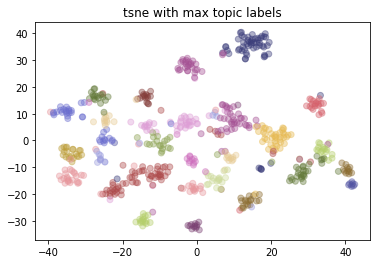

In [112]:
%pylab inline

cmap=plt.cm.get_cmap('tab20b', 20)
plt.scatter(doc_plot[:,0],doc_plot[:,1], c=doc_max_topic[::30], alpha=.4, cmap=cmap)
plt.title("tsne with max topic labels")
plt.savefig("TSNE_Met_NMF_DF_Full.pdf")

In [113]:
import matplotlib.patches as mpatches

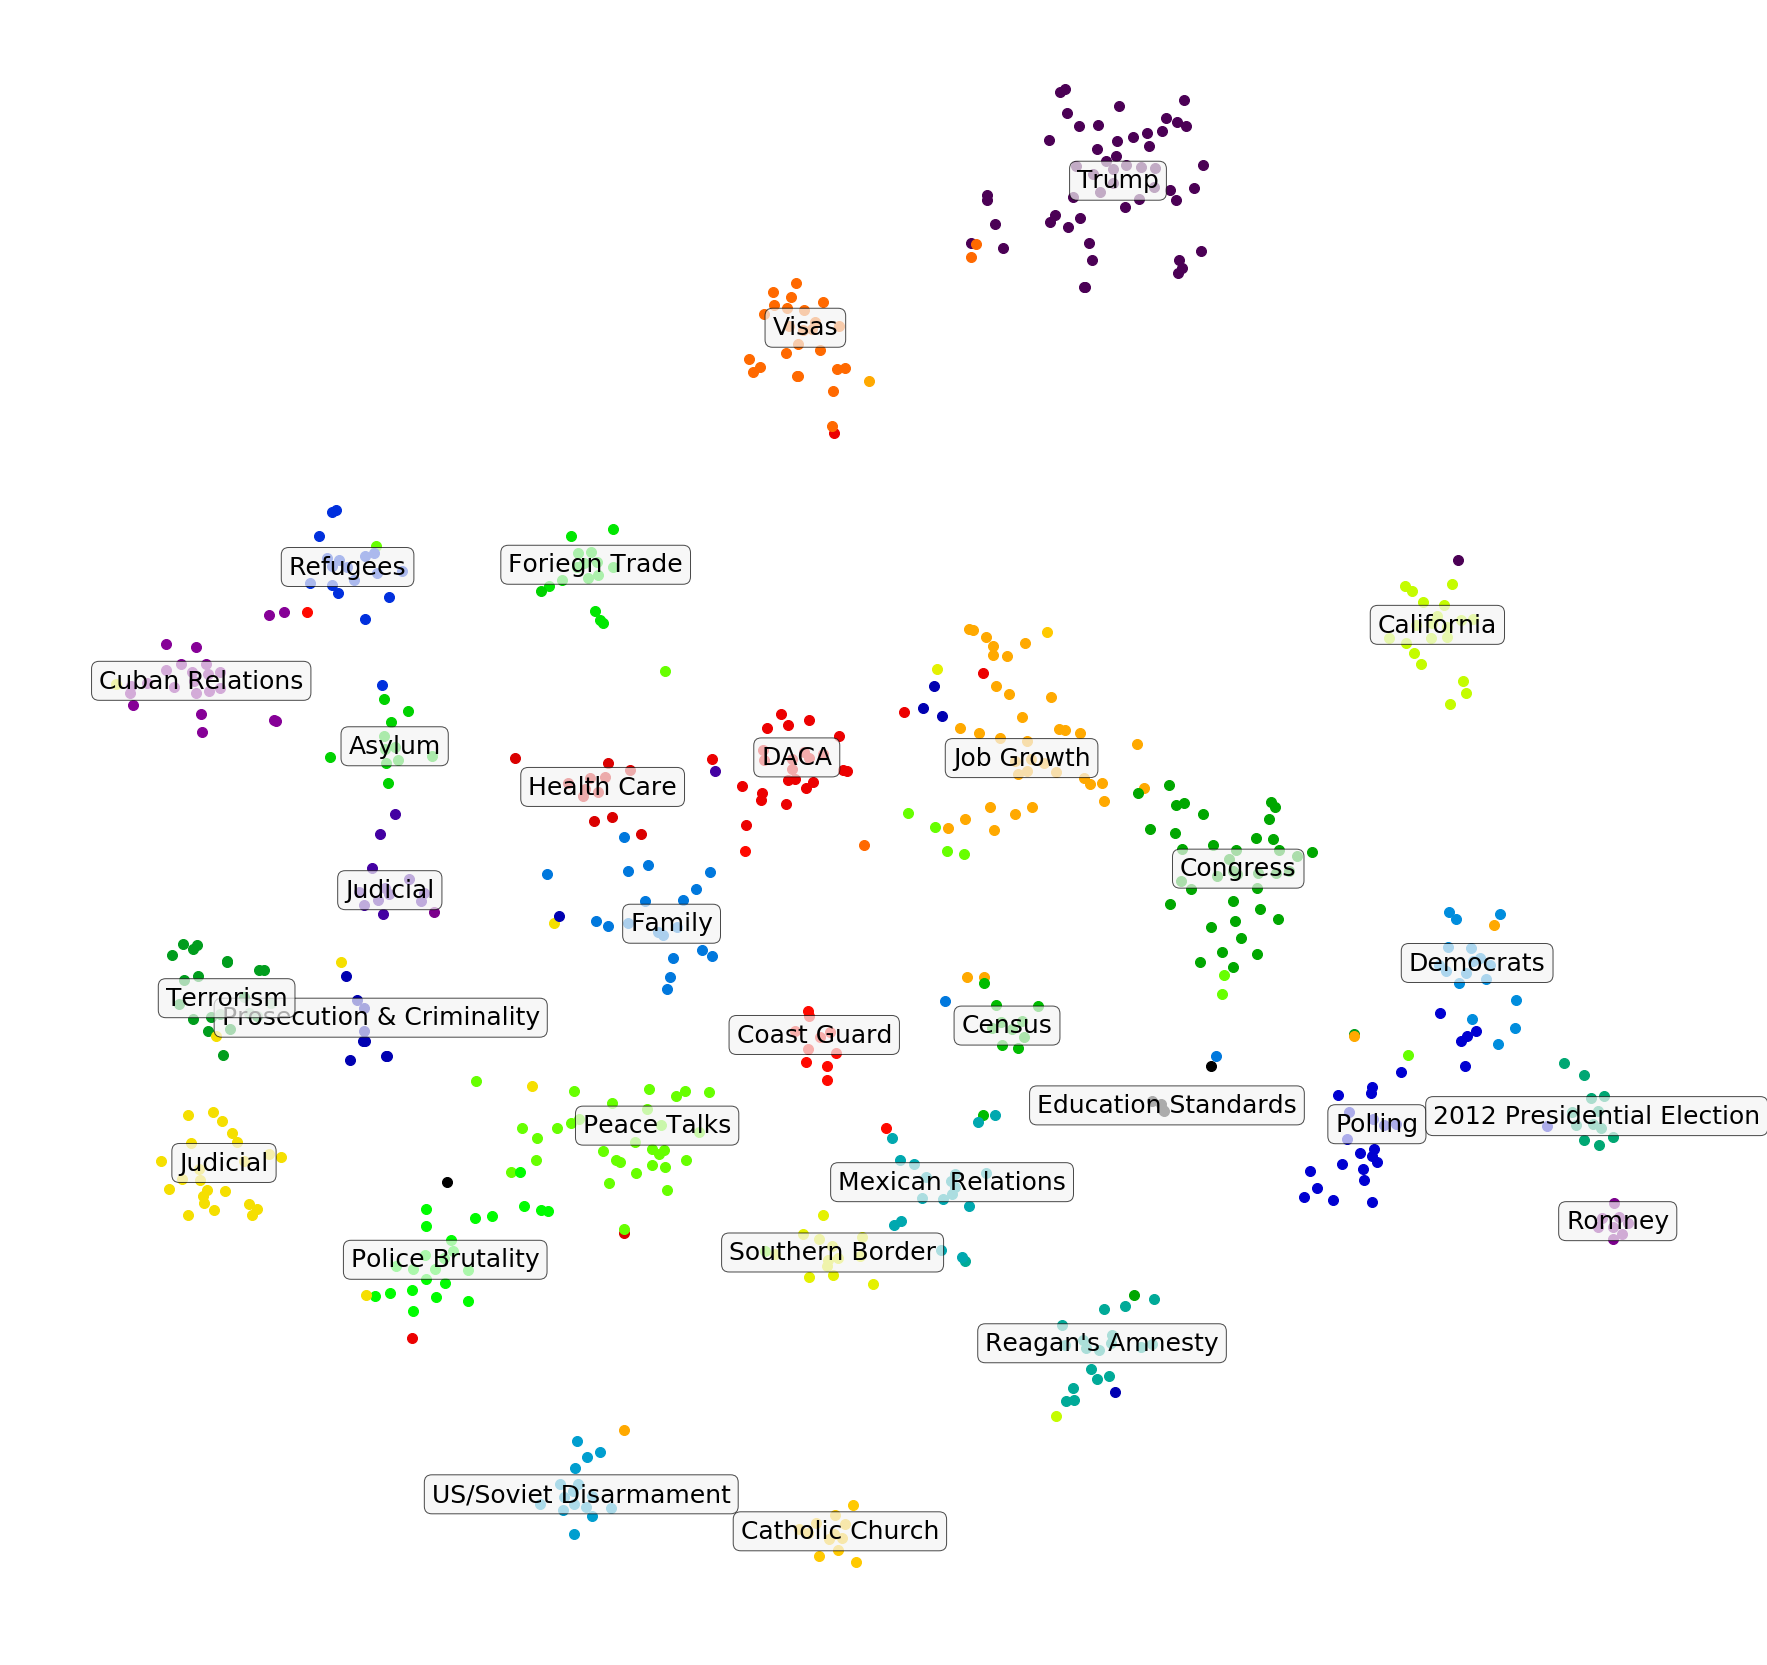

In [166]:

x = []
y = []
labels = []
topics= topic_labels
tokens = vector[::30,:]
for value in doc_plot:
    x.append(value[0])
    y.append(value[1])

cmap = matplotlib.cm.get_cmap('nipy_spectral')
cmapScale = int(cmap.N / num_topics)
plt.figure(figsize=(30, 30),facecolor='white')
labels = [] 
for i in range(len(x)):
    label = np.argmax(tokens[i])
    labels.append(label)
    plt.scatter(x[i],y[i], c=cmap(label*cmapScale),s=100)

color_legend = []
for i in range(num_topics):
    boolArr = np.array(labels) == i
    x_avg = np.median(np.array(x)[boolArr])
    y_avg = np.median(np.array(y)[boolArr])
    plt.annotate(topics[i],
                 xy=(x_avg, y_avg),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='center',
                 va='center',
                 fontsize=25,
                 bbox=dict(boxstyle="round", fc="whitesmoke",alpha=0.7))
    color_legend.append(mpatches.Patch(color=cmap(i*cmapScale), label=f'Topic #{i+1}: {topics[i]}'))
# plt.legend(handles=color_legend,fontsize=18)
plt.axis('off')
plt.savefig("TSNE_Met_NMF_DF_Full_label.pdf")

In [115]:
from mpl_toolkits.mplot3d import Axes3D

In [116]:
def plot_PCA_3D(data):
    doc_plot = TSNE(n_components=3,verbose=1, metric="cosine", perplexity=50).fit_transform(vector[::35,:])
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    

    ax.scatter(doc_plot[:,0],doc_plot[:,1],doc_plot[:,2], c=doc_max_topic[::35], alpha=.4, cmap=cmap)
    
    ax.set_xlabel('1st principle component')
    ax.set_ylabel('2nd principle component')
    ax.set_zlabel('3rd principle component')
    plt.legend()




[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 542 samples in 0.002s...
[t-SNE] Computed neighbors for 542 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 542 / 542
[t-SNE] Mean sigma: 0.353507
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.362343


No handles with labels found to put in legend.


[t-SNE] Error after 1000 iterations: 1.303167


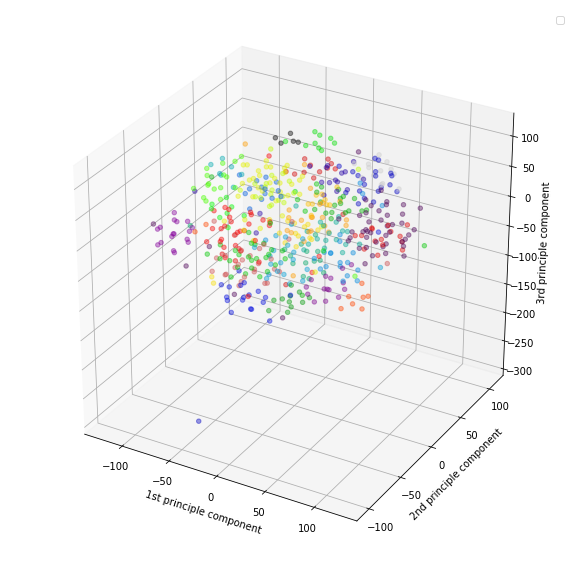

In [117]:
plot_PCA_3D(vector)

### sentiment analysis

In [170]:
master_df.article[0]

'[\'A son of Robert L. Vesco, the fugitive American financier who disappeared from his home in Nassau before Bahamian authorities could serve him with a deportation order, said today that his father would return Sunday.\', "\'\'He\'s not here right now and he won\'t be back until Sunday,\'\' Anthony Vesco, 23 years old, said in a telephone conversation to Miami.", "\'\'All I can say is that he will be back then.\'\'", \'Mr. Vesco apparently disappeared Tuesday, one day before Bahamian immigration officials went to his house to serve him with papers ordering him to leave the island nation in 14 days.\', "Ken Heinrich, chief of the Miami office of the Bahamas News Bureau, said earlier today that Bahamian authorities had no immediate plans to attempt to locate Mr. Vesco. Other sources reported, however, that the deportation order had been served on Mr. Vesco\'s son.", "The Bahamas Government refused to renew Mr. Vesco\'s yearly residency permit last December but had granted him an extensi

In [212]:
! pip install 

  Could not find a version that satisfies the requirement SentimentIntensityAnalyzer (from versions: )
No matching distribution found for SentimentIntensityAnalyzer
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [213]:
from nltk.tokenize import sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [214]:
from textblob import TextBlob
analyzer = SentimentIntensityAnalyzer()

In [233]:
def sentiment(article):
    score = []
    sentences = sent_tokenize(article)
    for sentence in sentences:
        score.append(analyzer.polarity_scores(sentence)['compound'])
    total_score = sum(score)/len(score)
    return total_score
        
    
    #sentiments = [TextBlob(sentence).sentiment.polarity for sentence in clean_book_sentences[novel_index]]

In [228]:
sentiment(master_df.article[0])

["['A son of Robert L. Vesco, the fugitive American financier who disappeared from his home in Nassau before Bahamian authorities could serve him with a deportation order, said today that his father would return Sunday.", '\', "\'\'He\'s not here right now and he won\'t be back until Sunday,\'\' Anthony Vesco, 23 years old, said in a telephone conversation to Miami.', '", "\'\'All I can say is that he will be back then.', '\'\'", \'Mr.', 'Vesco apparently disappeared Tuesday, one day before Bahamian immigration officials went to his house to serve him with papers ordering him to leave the island nation in 14 days.', '\', "Ken Heinrich, chief of the Miami office of the Bahamas News Bureau, said earlier today that Bahamian authorities had no immediate plans to attempt to locate Mr. Vesco.', "Other sources reported, however, that the deportation order had been served on Mr. Vesco's son.", '", "The Bahamas Government refused to renew Mr. Vesco\'s yearly residency permit last December but h

-0.07114999999999999

In [367]:
gr = pd.DataFrame(master_df.groupby('year')['sentiment'].mean()).reset_index()
x_sent=gr.year
y_sent = gr.sentiment


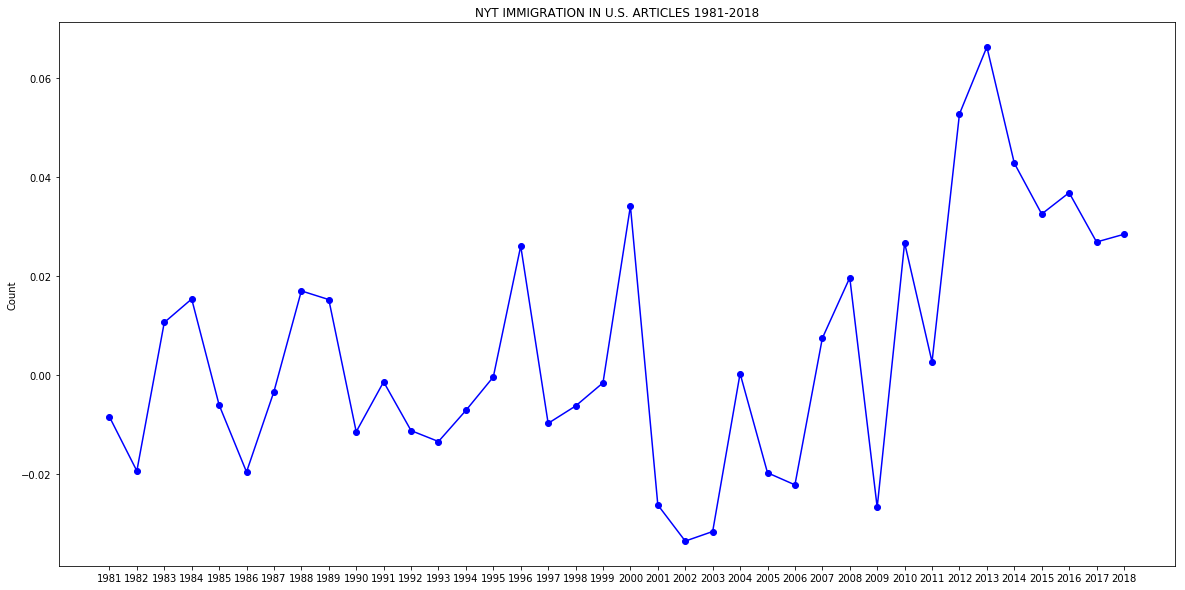

In [368]:
plt.figure(figsize=(20, 10))
plt.plot(x_sent, y_sent, 'bo-')
plt.xticks(x_sent, )
plt.ylabel('Count')
plt.title('NYT IMMIGRATION IN U.S. ARTICLES 1981-2018')
 
plt.show()

In [236]:
master_df['sentiment']

0       -0.071150
1       -0.075378
2       -0.060830
3        0.155539
4       -0.074069
5        0.009022
6        0.080662
7       -0.073329
8        0.092954
9        0.163562
10      -0.065000
11      -0.047550
12       0.011686
13       0.081665
14       0.028005
15       0.027250
16       0.008464
17      -0.017200
18       0.231372
19       0.066353
20      -0.376433
21       0.174450
22      -0.038376
23      -0.029322
24       0.031857
25      -0.076463
26      -0.143462
27      -0.078240
28       0.008433
29       0.142580
           ...   
18915    0.107238
18916    0.026411
18917    0.145302
18918    0.046180
18919   -0.220190
18920   -0.070114
18921    0.060183
18922   -0.018485
18923    0.030338
18924    0.108137
18925    0.027489
18926    0.037667
18927    0.086177
18928    0.030338
18929    0.054610
18930    0.092029
18931    0.190122
18932    0.095873
18933   -0.002546
18934    0.232821
18935   -0.165553
18936    0.115173
18937    0.217267
18938   -0.050060
18939   -0

In [371]:
from wordcloud import WordCloud


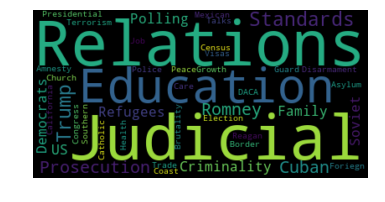

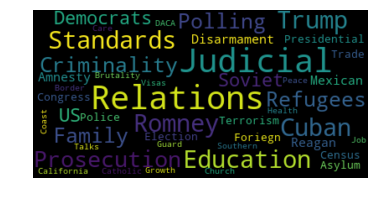

In [380]:
your_list = '\t'.join([
                   'Education Standards',
                   'Trump',
                   'Romney',
                   'Cuban Relations',
                   'Judicial',
                   'Prosecution & Criminality',
                   'Polling',
                   'Refugees',
                   'Family',
                   'Democrats',
                   'US/Soviet Disarmament',
                   'Mexican Relations',
                   'Reagan\'s Amnesty',
                   '2012 Presidential Election',
                   'Terrorism',
                   'Congress',
                   'Census',
                   'Asylum',
                   'Foriegn Trade',
                   'Police Brutality',
                   'Peace Talks',
                   'California',
                   'Southern Border',
                   'Judicial',
                   'Catholic Church',
                   'Job Growth',
                   'Visas',
                   'Coast Guard',
                   'DACA',
                   'Health Care'
               ])
# Generate a word cloud image
wordcloud = WordCloud().generate(your_list)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(your_list)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud.png")
plt.show()